In [4]:
import pandas as pd
import numpy as np


In [5]:
df = pd.read_excel("Data_Parkir_PWT.xlsx")


In [6]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  0 non-null      float64
 1   Lokasi                      440 non-null    object 
 2   Jenis Kendaraan             440 non-null    object 
 3   Hari                        440 non-null    object 
 4   Jam Ramai                   440 non-null    object 
 5   Unnamed: 5                  440 non-null    object 
 6   Jam Sedang                  440 non-null    object 
 7   Unnamed: 7                  440 non-null    object 
 8   Jam sepi                    440 non-null    object 
 9   Unnamed: 9                  440 non-null    object 
 10  Banyak Kendaraan            440 non-null    object 
 11  Unnamed: 11                 439 non-null    object 
 12  Unnamed: 12                 440 non-null    object 
 13  Sirkulasi Kendaraan         440 non

,Unnamed: 0,Total Ramai,Total Sedang,Total Sepi,Total Sehari,Tarif Parkir
count,0.0,439.000000,439.000000,439.000000,439.000000,439.000000
mean,NaN,28.285877,18.687927,8.810934,55.799544,1501.138952
std,NaN,34.165538,21.339009,11.332088,64.396112,500.569152
min,NaN,0.000000,0.000000,0.000000,0.000000,1000.000000
25%,NaN,11.000000,7.000000,3.000000,20.500000,1000.000000
50%,NaN,20.000000,12.000000,6.000000,37.000000,2000.000000
75%,NaN,33.000000,23.000000,11.000000,65.500000,2000.000000
max,NaN,374.000000,155.000000,86.000000,615.000000,2000.000000


In [7]:
df.head()

,Unnamed: 0,Lokasi,Jenis Kendaraan,Hari,Jam Ramai,Unnamed: 5,Jam Sedang,Unnamed: 7,Jam sepi,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Total Ramai,Total Sedang,Total Sepi,Total Sehari,Tarif Parkir,Pendapatan Parkir (sehari),Total (1 Minggu),Potensi 1 Tahun (40%)
0,NaN,NaN,NaN,NaN,Lama,Keterangan\n(Pukul Berapa),Lama,Keterangan\n(Pukul Berapa),Lama,Keterangan\n(Pukul Berapa),...,Sedang,Sepi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Toko Satria,Motor,Weekday,2,15.00-17.00,3,09.00-12.00,3,13.00-15.00,...,5,2,24.0,22.0,11.0,57.0,1000.0,57000,285000,5472000
2,NaN,Toko Mlati,Motor,Weekday,2,14.00-16.00,3,08.00-11.00,3,11.00-14.00,...,8,3,31.0,33.0,14.0,78.0,1000.0,78000,390000,7488000
3,NaN,Toko Pagoda,Motor,Weekday,2,13.00-15.00,3,09.00-12.00,2,15.00-17.00,...,5,3,41.0,29.0,14.0,84.0,1000.0,84000,420000,8064000
4,NaN,Matahari Bazzar,Motor,Weekday,3,18.00-21.00,5,"09.00-12.00, 15",2,13.00-15.00,...,7,3,53.0,47.0,13.0,113.0,1000.0,113000,565000,10848000


In [8]:
# 1. Hapus kolom tidak berguna (misalnya 'Unnamed' tanpa data penting)
df = df.drop(columns=['Unnamed: 0'])

# 2. Ganti nama kolom yang tidak jelas (optional, tergantung isi)
df.columns = [
    "Lokasi", "Jenis_Kendaraan", "Hari",
    "Jam_Ramai_Lama", "Jam_Ramai_Pukul",
    "Jam_Sedang_Lama", "Jam_Sedang_Pukul",
    "Jam_Sepi_Lama", "Jam_Sepi_Pukul",
    "Banyak_Kendaraan_Ramai", "Banyak_Kendaraan_Sedang", "Banyak_Kendaraan_Sepi",
    "Sirkulasi_Ramai", "Sirkulasi_Sedang", "Sirkulasi_Sepi",
    "Total_Ramai", "Total_Sedang", "Total_Sepi", "Total_Sehari",
    "Tarif_Parkir", "Pendapatan_Sehari", "Total_Mingguan", "Potensi_Tahunan"
]

# 3. Hapus baris kosong
df = df.dropna(subset=["Lokasi"])  # atau df.dropna(how='all')

# 4. Ubah kolom numerik ke float/int
numeric_cols = [
    "Banyak_Kendaraan_Ramai", "Banyak_Kendaraan_Sedang", "Banyak_Kendaraan_Sepi",
    "Sirkulasi_Ramai", "Sirkulasi_Sedang", "Sirkulasi_Sepi",
    "Total_Ramai", "Total_Sedang", "Total_Sepi", "Total_Sehari",
    "Tarif_Parkir", "Pendapatan_Sehari", "Total_Mingguan", "Potensi_Tahunan"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 5. Tangani missing values (jika perlu)
df = df.fillna(0)  # atau df.dropna()

# 6. Cek ulang
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 1 to 440
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Lokasi                   440 non-null    object 
 1   Jenis_Kendaraan          440 non-null    object 
 2   Hari                     440 non-null    object 
 3   Jam_Ramai_Lama           440 non-null    float64
 4   Jam_Ramai_Pukul          440 non-null    object 
 5   Jam_Sedang_Lama          440 non-null    float64
 6   Jam_Sedang_Pukul         440 non-null    object 
 7   Jam_Sepi_Lama            440 non-null    float64
 8   Jam_Sepi_Pukul           440 non-null    object 
 9   Banyak_Kendaraan_Ramai   440 non-null    float64
 10  Banyak_Kendaraan_Sedang  440 non-null    float64
 11  Banyak_Kendaraan_Sepi    440 non-null    float64
 12  Sirkulasi_Ramai          440 non-null    float64
 13  Sirkulasi_Sedang         440 non-null    float64
 14  Sirkulasi_Sepi           440 no

C:\Users\didik\AppData\Local\Temp\ipykernel_22604\4242404447.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)  # atau df.dropna()


In [9]:
df.head()


,Lokasi,Jenis_Kendaraan,Hari,Jam_Ramai_Lama,Jam_Ramai_Pukul,Jam_Sedang_Lama,Jam_Sedang_Pukul,Jam_Sepi_Lama,Jam_Sepi_Pukul,Banyak_Kendaraan_Ramai,...,Sirkulasi_Sedang,Sirkulasi_Sepi,Total_Ramai,Total_Sedang,Total_Sepi,Total_Sehari,Tarif_Parkir,Pendapatan_Sehari,Total_Mingguan,Potensi_Tahunan
1,Toko Satria,Motor,Weekday,2.0,15.00-17.00,3.0,09.00-12.00,3.0,13.00-15.00,10.0,...,5.0,2.0,24.0,22.0,11.0,57.0,1000.0,57000.0,285000.0,5472000.0
2,Toko Mlati,Motor,Weekday,2.0,14.00-16.00,3.0,08.00-11.00,3.0,11.00-14.00,13.0,...,8.0,3.0,31.0,33.0,14.0,78.0,1000.0,78000.0,390000.0,7488000.0
3,Toko Pagoda,Motor,Weekday,2.0,13.00-15.00,3.0,09.00-12.00,2.0,15.00-17.00,27.0,...,5.0,3.0,41.0,29.0,14.0,84.0,1000.0,84000.0,420000.0,8064000.0
4,Matahari Bazzar,Motor,Weekday,3.0,18.00-21.00,5.0,"09.00-12.00, 15",2.0,13.00-15.00,23.0,...,7.0,3.0,53.0,47.0,13.0,113.0,1000.0,113000.0,565000.0,10848000.0
5,Toko Bata,Motor,Weekday,3.0,18.00-21.00,6.0,"08.00-12.00, 15",2.0,13.00-15.00,31.0,...,6.0,4.0,55.0,48.0,15.0,118.0,1000.0,118000.0,590000.0,11328000.0


In [10]:

# Hitung total sirkulasi
df['Total Sirkulasi'] = df['Sirkulasi_Ramai'] + df['Sirkulasi_Sedang'] + df['Sirkulasi_Sepi']

# Hitung total durasi (jam)
df['Total Durasi Jam'] = df['Jam_Ramai_Lama'] + df['Jam_Sedang_Lama'] + df['Jam_Sepi_Lama']

# Hindari pembagian nol
df['Intensitas (kendaraan/jam)'] = df['Total Sirkulasi'] / df['Total Durasi Jam'].replace(0, 1)

# Hitung rata-rata dan standar deviasi intensitas
mean = df['Intensitas (kendaraan/jam)'].mean()
std = df['Intensitas (kendaraan/jam)'].std()

# Fungsi klasifikasi kerapatan berdasarkan intensitas
def klasifikasi_kerapatan(intensitas):
    if intensitas < mean - std:
        return 'Rendah'
    elif intensitas > mean + std:
        return 'Tinggi'
    else:
        return 'Sedang'

# Tambahkan kolom klasifikasi
df['Kerapatan jalan'] = df['Intensitas (kendaraan/jam)'].apply(klasifikasi_kerapatan)

# Simpan ke CSV jika perlu
df.to_csv('hasil_klasifikasi_intensitas.csv', index=False)

# Tampilkan hasil
print(df[['Lokasi', 'Total Sirkulasi', 'Total Durasi Jam', 'Intensitas (kendaraan/jam)', 'Kerapatan jalan']])


                         Lokasi  Total Sirkulasi  Total Durasi Jam  \
1                   Toko Satria             14.0               8.0   
2                    Toko Mlati             20.0               8.0   
3                   Toko Pagoda             15.0               7.0   
4               Matahari Bazzar             20.0              10.0   
5                     Toko Bata             18.0              11.0   
..                          ...              ...               ...   
436       Alfamart Wahid Hasyim              3.0              15.0   
437      Indomaret Wahid Hasyim              4.0              15.0   
438  Rocket Chiken Wahid Hasyim              2.0              11.0   
439                 Salsa Snack              3.0              15.0   
440             Sate Ahmad Yani              4.0              11.0   

     Intensitas (kendaraan/jam) Kerapatan jalan  
1                      1.750000          Sedang  
2                      2.500000          Tinggi  
3        

In [11]:
df.head()


,Lokasi,Jenis_Kendaraan,Hari,Jam_Ramai_Lama,Jam_Ramai_Pukul,Jam_Sedang_Lama,Jam_Sedang_Pukul,Jam_Sepi_Lama,Jam_Sepi_Pukul,Banyak_Kendaraan_Ramai,...,Total_Sepi,Total_Sehari,Tarif_Parkir,Pendapatan_Sehari,Total_Mingguan,Potensi_Tahunan,Total Sirkulasi,Total Durasi Jam,Intensitas (kendaraan/jam),Kerapatan jalan
1,Toko Satria,Motor,Weekday,2.0,15.00-17.00,3.0,09.00-12.00,3.0,13.00-15.00,10.0,...,11.0,57.0,1000.0,57000.0,285000.0,5472000.0,14.0,8.0,1.750000,Sedang
2,Toko Mlati,Motor,Weekday,2.0,14.00-16.00,3.0,08.00-11.00,3.0,11.00-14.00,13.0,...,14.0,78.0,1000.0,78000.0,390000.0,7488000.0,20.0,8.0,2.500000,Tinggi
3,Toko Pagoda,Motor,Weekday,2.0,13.00-15.00,3.0,09.00-12.00,2.0,15.00-17.00,27.0,...,14.0,84.0,1000.0,84000.0,420000.0,8064000.0,15.0,7.0,2.142857,Sedang
4,Matahari Bazzar,Motor,Weekday,3.0,18.00-21.00,5.0,"09.00-12.00, 15",2.0,13.00-15.00,23.0,...,13.0,113.0,1000.0,113000.0,565000.0,10848000.0,20.0,10.0,2.000000,Sedang
5,Toko Bata,Motor,Weekday,3.0,18.00-21.00,6.0,"08.00-12.00, 15",2.0,13.00-15.00,31.0,...,15.0,118.0,1000.0,118000.0,590000.0,11328000.0,18.0,11.0,1.636364,Sedang


In [12]:
df.head()

,Lokasi,Jenis_Kendaraan,Hari,Jam_Ramai_Lama,Jam_Ramai_Pukul,Jam_Sedang_Lama,Jam_Sedang_Pukul,Jam_Sepi_Lama,Jam_Sepi_Pukul,Banyak_Kendaraan_Ramai,...,Total_Sepi,Total_Sehari,Tarif_Parkir,Pendapatan_Sehari,Total_Mingguan,Potensi_Tahunan,Total Sirkulasi,Total Durasi Jam,Intensitas (kendaraan/jam),Kerapatan jalan
1,Toko Satria,Motor,Weekday,2.0,15.00-17.00,3.0,09.00-12.00,3.0,13.00-15.00,10.0,...,11.0,57.0,1000.0,57000.0,285000.0,5472000.0,14.0,8.0,1.750000,Sedang
2,Toko Mlati,Motor,Weekday,2.0,14.00-16.00,3.0,08.00-11.00,3.0,11.00-14.00,13.0,...,14.0,78.0,1000.0,78000.0,390000.0,7488000.0,20.0,8.0,2.500000,Tinggi
3,Toko Pagoda,Motor,Weekday,2.0,13.00-15.00,3.0,09.00-12.00,2.0,15.00-17.00,27.0,...,14.0,84.0,1000.0,84000.0,420000.0,8064000.0,15.0,7.0,2.142857,Sedang
4,Matahari Bazzar,Motor,Weekday,3.0,18.00-21.00,5.0,"09.00-12.00, 15",2.0,13.00-15.00,23.0,...,13.0,113.0,1000.0,113000.0,565000.0,10848000.0,20.0,10.0,2.000000,Sedang
5,Toko Bata,Motor,Weekday,3.0,18.00-21.00,6.0,"08.00-12.00, 15",2.0,13.00-15.00,31.0,...,15.0,118.0,1000.0,118000.0,590000.0,11328000.0,18.0,11.0,1.636364,Sedang


In [13]:
data_b = pd.read_csv('output_kerapatan\hasil_kerapatan_terpotong.csv')

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\didik\AppData\Local\Temp\ipykernel_22604\3107584990.py:1: SyntaxWarning: invalid escape sequence '\h'
  data_b = pd.read_csv('output_kerapatan\hasil_kerapatan_terpotong.csv')


In [14]:
data_b = data_b.rename(columns={'nama_bangunan': 'Lokasi'})

In [15]:
data_gabungan = pd.merge(df, data_b, on='Lokasi', how='left')

In [16]:
data_gabungan.tail()

,Lokasi,Jenis_Kendaraan,Hari,Jam_Ramai_Lama,Jam_Ramai_Pukul,Jam_Sedang_Lama,Jam_Sedang_Pukul,Jam_Sepi_Lama,Jam_Sepi_Pukul,Banyak_Kendaraan_Ramai,...,Tarif_Parkir,Pendapatan_Sehari,Total_Mingguan,Potensi_Tahunan,Total Sirkulasi,Total Durasi Jam,Intensitas (kendaraan/jam),Kerapatan jalan,building_density,kategori_kerapatan
435,Alfamart Wahid Hasyim,mobil,weekend,4.0,18.00-22.00,5.0,07.00-12.00,6.0,12.00-18.00,2.0,...,2000.0,36000.0,72000.0,1382400.0,3.0,15.0,0.200000,Sedang,0.385687,Sedang
436,Indomaret Wahid Hasyim,mobil,weekend,4.0,18.00-22.00,5.0,07.00-12.00,6.0,12.00-18.00,3.0,...,2000.0,50000.0,100000.0,1920000.0,4.0,15.0,0.266667,Sedang,0.394137,Sedang
437,Rocket Chiken Wahid Hasyim,mobil,weekend,3.0,10.00-13.00,3.0,18.00-21.00,5.0,13.00-18.00,2.0,...,2000.0,22000.0,44000.0,844800.0,2.0,11.0,0.181818,Sedang,0.393888,Sedang
438,Salsa Snack,mobil,weekend,3.0,06.00-09.00,7.0,09.00-16.00,5.0,16.00-21.00,2.0,...,2000.0,34000.0,68000.0,1305600.0,3.0,15.0,0.200000,Sedang,0.137725,Rendah
439,Sate Ahmad Yani,mobil,weekend,3.0,18.00-21.00,3.0,10.00-13.00,5.0,13.00-18.00,5.0,...,2000.0,48000.0,96000.0,1843200.0,4.0,11.0,0.363636,Sedang,0.442726,Sedang


In [17]:
data_gabungan.to_csv('data_gabungan.csv', index=False)

In [18]:
data_gabungan.head()

,Lokasi,Jenis_Kendaraan,Hari,Jam_Ramai_Lama,Jam_Ramai_Pukul,Jam_Sedang_Lama,Jam_Sedang_Pukul,Jam_Sepi_Lama,Jam_Sepi_Pukul,Banyak_Kendaraan_Ramai,...,Tarif_Parkir,Pendapatan_Sehari,Total_Mingguan,Potensi_Tahunan,Total Sirkulasi,Total Durasi Jam,Intensitas (kendaraan/jam),Kerapatan jalan,building_density,kategori_kerapatan
0,Toko Satria,Motor,Weekday,2.0,15.00-17.00,3.0,09.00-12.00,3.0,13.00-15.00,10.0,...,1000.0,57000.0,285000.0,5472000.0,14.0,8.0,1.750000,Sedang,0.296536,Rendah
1,Toko Mlati,Motor,Weekday,2.0,14.00-16.00,3.0,08.00-11.00,3.0,11.00-14.00,13.0,...,1000.0,78000.0,390000.0,7488000.0,20.0,8.0,2.500000,Tinggi,0.463751,Sedang
2,Toko Pagoda,Motor,Weekday,2.0,13.00-15.00,3.0,09.00-12.00,2.0,15.00-17.00,27.0,...,1000.0,84000.0,420000.0,8064000.0,15.0,7.0,2.142857,Sedang,0.445390,Sedang
3,Matahari Bazzar,Motor,Weekday,3.0,18.00-21.00,5.0,"09.00-12.00, 15",2.0,13.00-15.00,23.0,...,1000.0,113000.0,565000.0,10848000.0,20.0,10.0,2.000000,Sedang,0.458037,Sedang
4,Toko Bata,Motor,Weekday,3.0,18.00-21.00,6.0,"08.00-12.00, 15",2.0,13.00-15.00,31.0,...,1000.0,118000.0,590000.0,11328000.0,18.0,11.0,1.636364,Sedang,0.446356,Sedang


In [19]:
kolom_dipilih = [
    "Lokasi",
    "Intensitas (kendaraan/jam)",
    
    "building_density",
    
]

df_terpilih = data_gabungan[kolom_dipilih]

# Tampilkan hasil
print(df_terpilih)

# Jika ingin simpan ke file baru
df_terpilih.to_csv("data_terpilih.csv", index=False)

                         Lokasi  Intensitas (kendaraan/jam)  building_density
0                   Toko Satria                    1.750000          0.296536
1                    Toko Mlati                    2.500000          0.463751
2                   Toko Pagoda                    2.142857          0.445390
3               Matahari Bazzar                    2.000000          0.458037
4                     Toko Bata                    1.636364          0.446356
..                          ...                         ...               ...
435       Alfamart Wahid Hasyim                    0.200000          0.385687
436      Indomaret Wahid Hasyim                    0.266667          0.394137
437  Rocket Chiken Wahid Hasyim                    0.181818          0.393888
438                 Salsa Snack                    0.200000          0.137725
439             Sate Ahmad Yani                    0.363636          0.442726

[440 rows x 3 columns]


In [20]:
df_terpilih

,Lokasi,Intensitas (kendaraan/jam),building_density
0,Toko Satria,1.750000,0.296536
1,Toko Mlati,2.500000,0.463751
2,Toko Pagoda,2.142857,0.445390
3,Matahari Bazzar,2.000000,0.458037
4,Toko Bata,1.636364,0.446356
...,...,...,...
435,Alfamart Wahid Hasyim,0.200000,0.385687
436,Indomaret Wahid Hasyim,0.266667,0.394137
437,Rocket Chiken Wahid Hasyim,0.181818,0.393888
438,Salsa Snack,0.200000,0.137725


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

# Baca data dari CSV (misalnya kolom: Lokasi, Intensitas (kendaraan/jam), building_density)
data = pd.read_csv('data_terpilih.csv')
data_clean = data.dropna()

# Variabel fuzzy
intensitas_kendaraan = ctrl.Antecedent(np.arange(0, 2001, 1), 'intensitas_kendaraan')
building_density = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'building_density')
rekomendasi = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'rekomendasi')

# Fungsi keanggotaan untuk intensitas kendaraan
intensitas_kendaraan['rendah'] = fuzz.trimf(intensitas_kendaraan.universe, [0, 0, 800])
intensitas_kendaraan['sedang'] = fuzz.trimf(intensitas_kendaraan.universe, [600, 1000, 1400])
intensitas_kendaraan['tinggi'] = fuzz.trimf(intensitas_kendaraan.universe, [1200, 2000, 2000])

# Fungsi keanggotaan untuk building density
building_density['rendah'] = fuzz.trimf(building_density.universe, [0, 0, 0.3])
building_density['sedang'] = fuzz.trimf(building_density.universe, [0.25, 0.45, 0.6])
building_density['tinggi'] = fuzz.trimf(building_density.universe, [0.5, 0.7, 1])

# Fungsi keanggotaan untuk rekomendasi
rekomendasi['rendah'] = fuzz.trimf(rekomendasi.universe, [0, 0, 0.4])
rekomendasi['sedang'] = fuzz.trimf(rekomendasi.universe, [0.3, 0.5, 0.7])
rekomendasi['tinggi'] = fuzz.trimf(rekomendasi.universe, [0.6, 1, 1])

# Aturan fuzzy
rules = [
    # Jika Intensitas RENDAH:
    # Lalu lintas sangat rendah, kepadatan bangunan juga rendah/sedang: SANGAT BAIK
    ctrl.Rule(intensitas_kendaraan['rendah'] & building_density['rendah'], rekomendasi['tinggi']),
    ctrl.Rule(intensitas_kendaraan['rendah'] & building_density['sedang'], rekomendasi['tinggi']),

    # Lalu lintas sangat rendah, tapi kepadatan bangunan sudah tinggi: Cukup BAIK (ada potensi masalah meskipun lalu lintas rendah)
    ctrl.Rule(intensitas_kendaraan['rendah'] & building_density['tinggi'], rekomendasi['sedang']),

    # Jika Intensitas SEDANG:
    # Lalu lintas sedang, kepadatan bangunan rendah:
    # Ini yang perlu dipertimbangkan: Apakah "sedang" lalu lintas masih bisa dianggap "tinggi" rekomendasinya?
    # Jika iya, berarti lalu lintas sedang masih oke di area low density.
    # Jika tidak, mungkin lebih ke "sedang". Saya akan menyarankan "sedang" untuk lebih aman.
    # ctrl.Rule(intensitas_kendaraan['sedang'] & building_density['rendah'], rekomendasi['tinggi']), # Aturan asli Anda
    ctrl.Rule(intensitas_kendaraan['sedang'] & building_density['rendah'], rekomendasi['sedang']), # Saran saya

    # Lalu lintas sedang, kepadatan bangunan sedang: CUKUP BAIK
    ctrl.Rule(intensitas_kendaraan['sedang'] & building_density['sedang'], rekomendasi['sedang']),

    # Lalu lintas sedang, kepadatan bangunan tinggi: KURANG BAIK (karena traffic sudah mulai ramai dan padat)
    ctrl.Rule(intensitas_kendaraan['sedang'] & building_density['tinggi'], rekomendasi['rendah']),

    # Jika Intensitas TINGGI:
    # Lalu lintas tinggi, tidak peduli kepadatan bangunan: KURANG BAIK
    ctrl.Rule(intensitas_kendaraan['tinggi'] & building_density['rendah'], rekomendasi['rendah']), # Asalnya sedang, saya ubah ke rendah
    ctrl.Rule(intensitas_kendaraan['tinggi'] & building_density['sedang'], rekomendasi['rendah']),
    ctrl.Rule(intensitas_kendaraan['tinggi'] & building_density['tinggi'], rekomendasi['rendah']),
]
# Simulasi
recommendation_ctrl = ctrl.ControlSystem(rules)
recommendation_sim = ctrl.ControlSystemSimulation(recommendation_ctrl)

results = []
for i, row in data_clean.iterrows():
    recommendation_sim.input['intensitas_kendaraan'] = row['Intensitas (kendaraan/jam)']
    recommendation_sim.input['building_density'] = row['building_density']
    recommendation_sim.compute()
    results.append((row['Lokasi'], recommendation_sim.output['rekomendasi']))

# Tampilkan hasil
results_df = pd.DataFrame(results, columns=['Lokasi', 'Nilai Rekomendasi'])
results_df = results_df.sort_values(by='Nilai Rekomendasi', ascending=False).reset_index(drop=True)

print(results_df)


                             Lokasi  Nilai Rekomendasi
0    alet mas plastik - studio beau           0.866667
1                Alfamart Kr Pucung           0.866667
2                Alfamart Kr Pucung           0.866667
3     ral Mode, Titipkue, Gajah Sak           0.866667
4                Alfamart Kr Pucung           0.866667
..                              ...                ...
390                   Toko Intisari           0.615784
391                           Abata           0.500000
392                           Abata           0.500000
393                           Abata           0.500000
394                           Abata           0.500000

[395 rows x 2 columns]


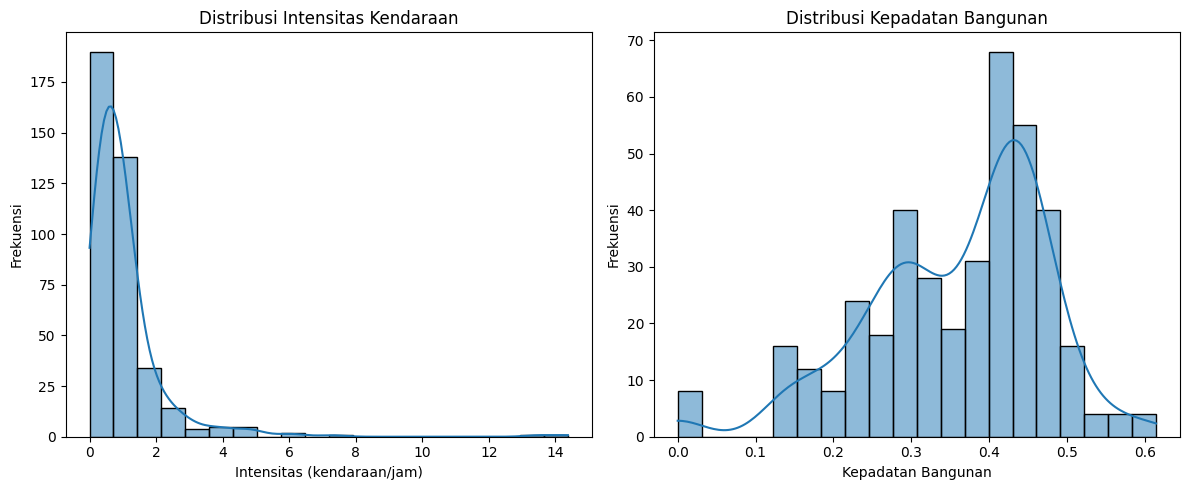

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (kode Anda yang sudah ada untuk memuat data dan pengaturan logika fuzzy) ...

# Plotting histogram untuk variabel input
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data_clean['Intensitas (kendaraan/jam)'], kde=True, bins=20)
plt.title('Distribusi Intensitas Kendaraan')
plt.xlabel('Intensitas (kendaraan/jam)')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(data_clean['building_density'], kde=True, bins=20)
plt.title('Distribusi Kepadatan Bangunan')
plt.xlabel('Kepadatan Bangunan')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

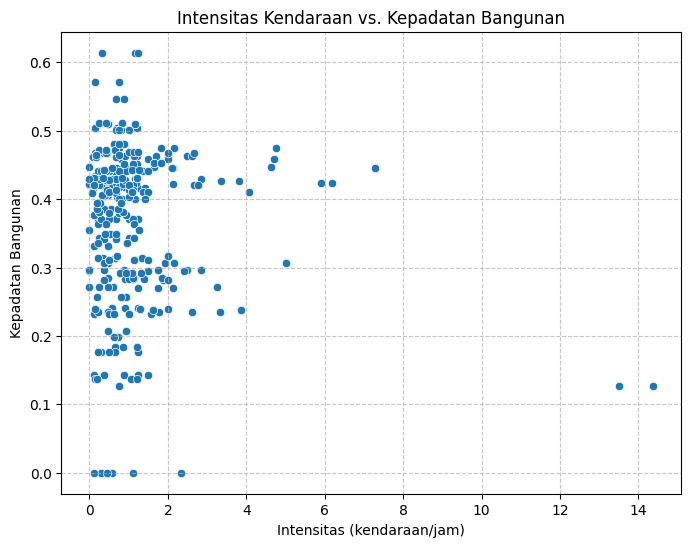

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_clean['Intensitas (kendaraan/jam)'], y=data_clean['building_density'])
plt.title('Intensitas Kendaraan vs. Kepadatan Bangunan')
plt.xlabel('Intensitas (kendaraan/jam)')
plt.ylabel('Kepadatan Bangunan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

c:\Users\didik\AppData\Local\Programs\Python\Python313\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


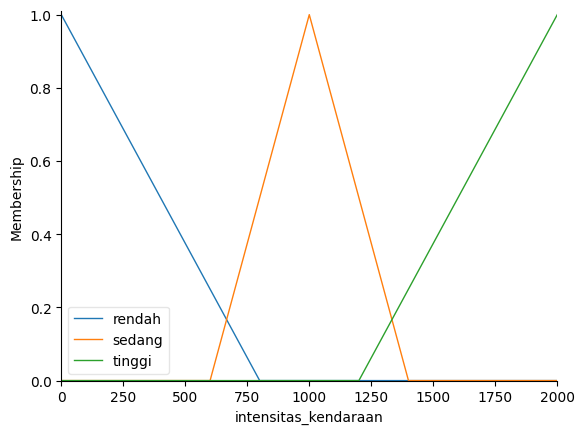

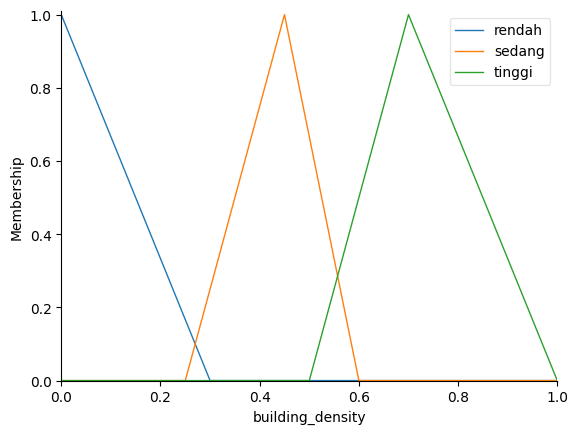

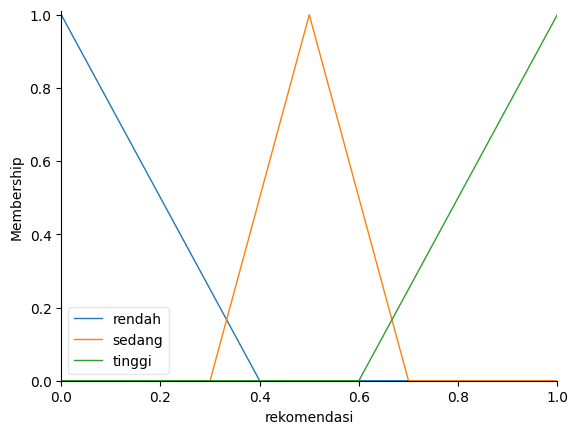

In [23]:
intensitas_kendaraan.view()
building_density.view()
rekomendasi.view()

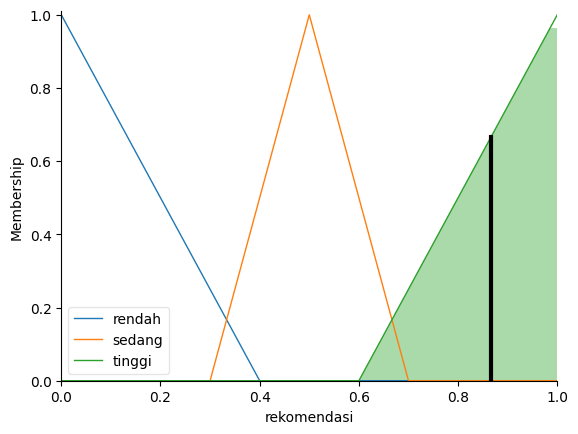

In [24]:
rekomendasi.view(sim=recommendation_sim)